# All You Need to Know about Linear Regression for ININ Exam

No need to know the coding part, but it is important to know what we are doing!

In [1]:
install.packages("haven")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# it will take some time to install this package
install.packages("plm")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(pacman)
p_load(data.table, magrittr, ggplot2, knitr, psych, stargazer, MASS,
        ISLR, wooldridge, performance, see, patchwork, haven, plm)

Warning message:
“package ‘pacman’ was built under R version 4.2.3”


## Dependent variables

How could we measure innovation?

- from patent?
- from survey?
- others?

In [4]:
aghion_data <-  read_dta("data/Aghion_2013.dta")

In [5]:
# each row is a patent from a certain company
head(aghion_data)

cusip  cic data6    data12   data29 coname    gvkey year owncusip  
1 885535 104  293.890  408.388 1.896  3COM CORP 10553 1991 0008855351
2 885535 104  444.343  826.995 2.306  3COM CORP 10553 1993 0008855351
3 885535 104  839.676 1295.311 3.072  3COM CORP 10553 1994 0008855351
4 885535 104 1525.117 2327.101 5.19   3COM CORP 10553 1995 0008855351
5 885535 104 2266.275 3147.106 7.109  3COM CORP 10553 1996 0008855351
6 885535 104 4080.520 5420.367 12.92  3COM CORP 10553 1997 0008855351
  instit_own ⋯ _Isic4_5616 _Isic4_5617 _Isic4_5621 _Isic4_6214 _Isic4_6215
1  63        ⋯ 0           0           0           0           0          
2 117        ⋯ 0           0           0           0           0          
3 128        ⋯ 0           0           0           0           0          
4 199        ⋯ 0           0           0           0           0          
5 304        ⋯ 0           0           0           0           0          
6 348        ⋯ 0           0           0           0           0          
  _Isic4_6231 _Isic4_7211 _Isic4_7221 _Isic4_8123 _Isic4_9999
1 0           0           0           0           0          
2 0           0           0           0           0          
3 0           0           0           0           0          
4 0           0           0           0           0          
5 0           0           0           0           0          
6 0           0           0           0           0

The above data is from a paper called [innovation and institutional ownership](https://www.aeaweb.org/articles?id=10.1257/aer.103.1.277)

The key finding of the paper is that greater institutional ownership is associated with more innovation. We need to know:

- How to measure innovation?
- How to measure institutional ownership?


By reading the paper, we learned that authors are using `citation` as a measure of innovation. The number of citations a paper receives is a measure of how influential it is. The assumption is that more influential patents are more innovative.

In [6]:
# select two columns to have a look at the dataset
aghion_data %>%
  as.data.table() %>%
  .[, .(cites, lcites)] %>%
  head()

cites lcites  
1  28   3.332205
2 237   5.468060
3 414   6.025866
4 553   6.315358
5 323   5.777652
6 398   5.986452

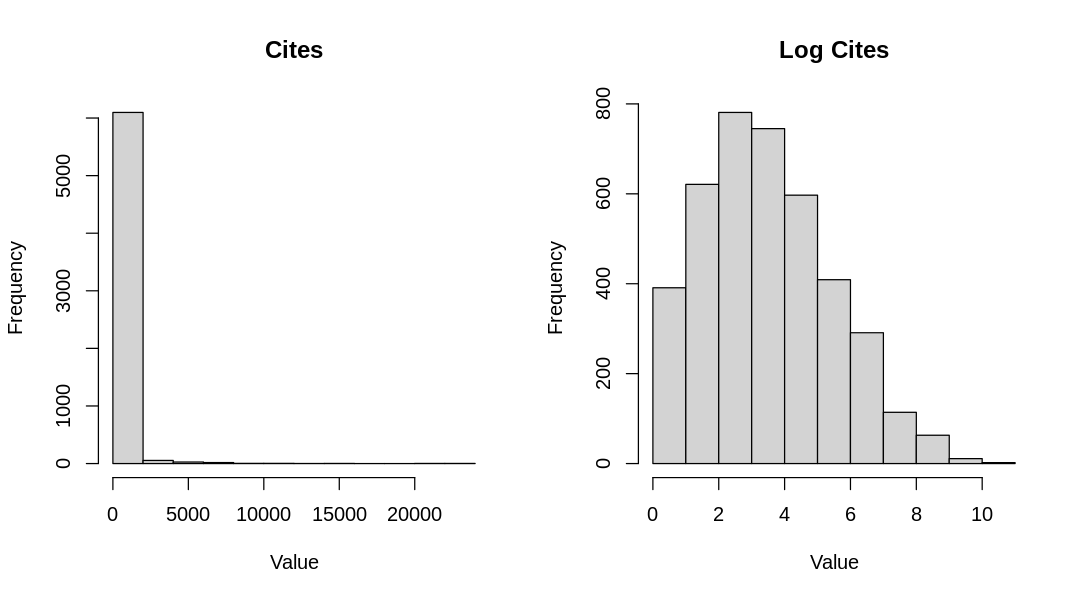

In [7]:
# let's check variables that include 'cite'
options(repr.plot.width = 9, repr.plot.height = 5)
aghion_data %>%
    as.data.table() %>%
    # select columns - cites and lcites
    .[, .(cites, lcites)] -> citation_data

par(mfrow = c(1, 2))
hist(citation_data$cites, main = "Cites", xlab = "Value", ylab = "Frequency")
hist(citation_data$lcites, main = "Log Cites", xlab = "Value", ylab = "Frequency")

Possible exam questions:

- please interpret figures above
- does the distrubtion look more like normal distribution after taking the log

__Skewed Distributions__: Many real-world variables, such as income, population, and certain types of counts, have positively skewed distributions. Log transformation can reduce skewness and make the distribution more symmetric, which is often an assumption in regression analysis.

In the olat, I have uploded the innovation community survey, please have a look at the survey and identify those questions and answers that could be used
as a measurement of innovation.

## Independent variables and control variables

When we conduct our research, we might want to construct the following hypothesis:

- H0: The more exercise a person do, the healthier she/he will become

Here, we have dependent variable is the measurement of being healthy, and
the independent variable (or key variable we are interested in) is the amount
of exercise (measured by hours of running or other indicators). However,
__we know that there are other factors, such as good sleep, eating habit, etc.
also have impact on a person's health__. Those variables are control variables.

Now, suppose you want to study the relationship between being innovative and the
intensity of collaboration between a firm and public institutions such as
universities.

- what is your depdent variable, how do you measure it?
- what is your key indedpent variable, how do you meaure it?
- what are control variables you need to consider, please list them and justfiy your choice based on economic theory and business logic?
- please write down a linear regression equation that could be used to study this relationship.

## A simple example

### Hypothesis

**Null Hypothesis ($H_0$)**: There is no relationship between education and wage. Formally, the coefficient of education in the regression model is zero ($\beta_1 = 0$).

**Alternative Hypothesis ($H_A$)**: There is a positive relationship between education and wage. Formally, the coefficient of education in the regression model is greater than zero ($\beta_1 > 0$).

### Linear Regression Model

To build a simple linear regression model where the dependent variable is wage and the independent variable is education, you can specify the model as follows:

$$
\text{Wage}_i = \beta_0 + \beta_1 \text{Education}_i + \epsilon_i
$$

Where:
- $\text{Wage}_i$ is the wage of individual $i$.
- $\text{Education}_i$ is the number of years of education of individual $i$.
- $\beta_0$ is the intercept term (the expected wage when education is zero).
- $\beta_1$ is the slope coefficient (the change in wage for each additional year of education).
- $\epsilon_i$ is the error term (the difference between the observed and predicted wages).


We have set up the following assumptions for a simple linear regression model.

| Assumptions|Diagnostic check|
|:---------| ---------------|
A1: linear relationship between $y$ and $x$| check via plots |
A2: independence of observations | check via plots |
A3: $E(\epsilon \|x) = 0$ | check via plots |
A4: $Var(\epsilon \|x) = \sigma^2 $ | check via plots|
A5: normal distribution of $\epsilon \sim N(0, \sigma^2)$ | check via plots |
A6: No correlation between $x$ and $\epsilon$ | check via plots |

In [8]:
# load the data
data("wage1")
# convert it to data.table
wage1 <- as.data.table(wage1)

head(wage1)

wage educ exper tenure nonwhite female married numdep smsa northcen ⋯
1 3.10 11    2     0     0        1      0       2      1    0        ⋯
2 3.24 12   22     2     0        1      1       3      1    0        ⋯
3 3.00 11    2     0     0        0      0       2      0    0        ⋯
4 6.00  8   44    28     0        0      1       0      1    0        ⋯
5 5.30 12    7     2     0        0      1       1      0    0        ⋯
6 8.75 16    9     8     0        0      1       0      1    0        ⋯
  trcommpu trade services profserv profocc clerocc servocc lwage    expersq
1 0        0     0        0        0       0       0       1.131402    4   
2 0        0     1        0        0       0       1       1.175573  484   
3 0        1     0        0        0       0       0       1.098612    4   
4 0        0     0        0        0       1       0       1.791759 1936   
5 0        0     0        0        0       0       0       1.667707   49   
6 0        0     0        1        1       0       0       2.169054   81   
  tenursq
1   0    
2   4    
3   0    
4 784    
5   4    
6  64

As we can see that we have many variables, however we are mainly interested in the relationship between `wage` and `education`, so we will only focus on these two variables and other control variables such as:


- wage: average hourly earnings
- educ: years of education
- exper: years of experience
- female: =1 if female otherwise =0

In [9]:
wage1 %>%
    # lwage = log transformation of wage
    .[, .(wage, educ, exper, female, lwage)] %>%
    head()

wage educ exper female lwage   
1 3.10 11    2    1      1.131402
2 3.24 12   22    1      1.175573
3 3.00 11    2    0      1.098612
4 6.00  8   44    0      1.791759
5 5.30 12    7    0      1.667707
6 8.75 16    9    0      2.169054

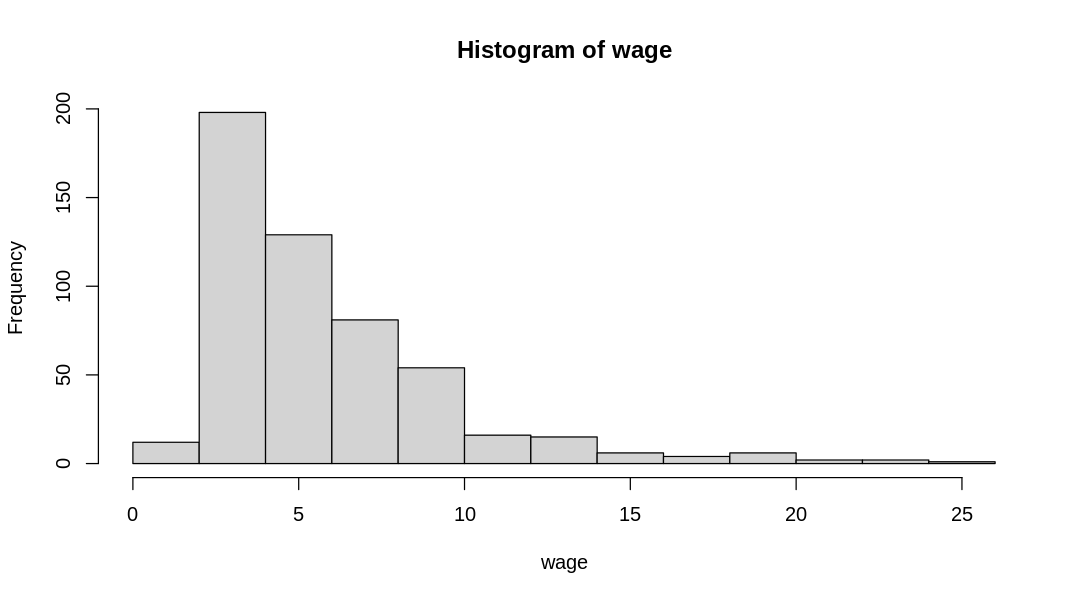

In [10]:
wage1 %>%
    with(hist(wage))

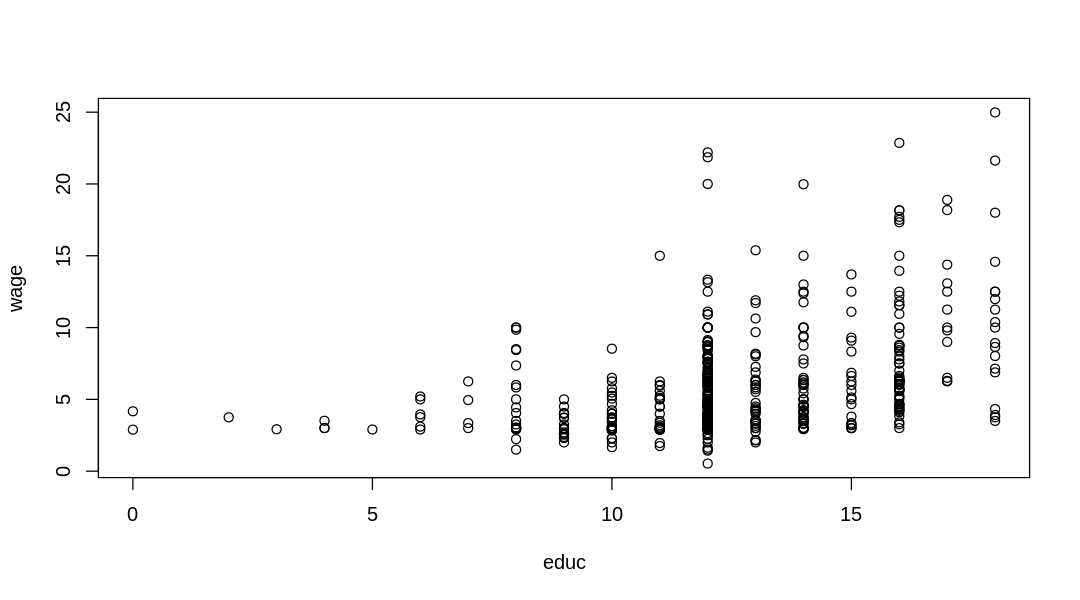

In [11]:
# bivariate analysis
wage1 %>%
    with(plot(educ, wage))

In [12]:
# run regression
wage_reg1 <- lm(wage ~ educ, data=wage1)

stargazer(wage_reg1, type="text")


                        Dependent variable:    
                    ---------------------------
                               wage            
-----------------------------------------------
educ                         0.541***          
                              (0.053)          
                                               
Constant                      -0.905           
                              (0.685)          
                                               
-----------------------------------------------
Observations                    526            
R2                             0.165           
Adjusted R2                    0.163           
Residual Std. Error      3.378 (df = 524)      
F Statistic          103.363*** (df = 1; 524)  
Note:               *p<0.1; **p<0.05; ***p<0.01


The model predicts that __an increase in education of 1 year is associated with an increase of 0.5411 dollar an hour in wage__. The intercept of −0.9049 literally means that a person with no education has a predicted hourly wage of −90 cent an hour. __This, of course, is silly. Therefore, we must interpret this equation with caution__.

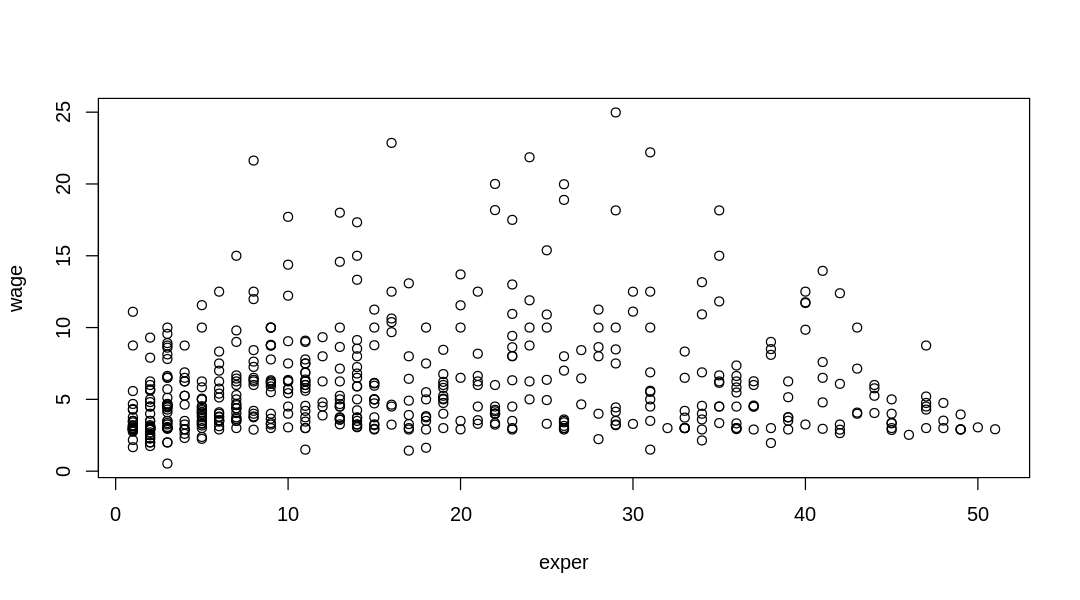

In [13]:
# now we continue to explore relationship between wage and exper
# bivariate: experience and wage
wage1 %>%
    with(plot(exper, wage))

Here we notice that there is some __nonlinear relationship__ between `wage` and `exper`,
which is not surprising. The wage normally increases with experience, but it will stop
after reaching a certain level. For instance, most people will not get a higher wage after
working for 20 to 30 years (say after 60 years old).

In [14]:
# let's run regression
wage_reg2 <- lm(wage ~ educ + exper, data=wage1)

stargazer(wage_reg2, type="text")


                        Dependent variable:    
                    ---------------------------
                               wage            
-----------------------------------------------
educ                         0.644***          
                              (0.054)          
                                               
exper                        0.070***          
                              (0.011)          
                                               
Constant                     -3.391***         
                              (0.767)          
                                               
-----------------------------------------------
Observations                    526            
R2                             0.225           
Adjusted R2                    0.222           
Residual Std. Error      3.257 (df = 523)      
F Statistic           75.990*** (df = 2; 523)  
Note:               *p<0.1; **p<0.05; ***p<0.01


In [15]:
# let's add non-linear term
wage_reg3 <- lm(wage ~ educ + exper + I(exper^2), data=wage1)

stargazer(wage_reg1, wage_reg2, wage_reg3, type="text")


                                              Dependent variable:                           
                    ------------------------------------------------------------------------
                                                      wage                                  
                              (1)                      (2)                     (3)          
--------------------------------------------------------------------------------------------
educ                        0.541***                0.644***                0.595***        
                            (0.053)                  (0.054)                 (0.053)        
                                                                                            
exper                                               0.070***                0.268***        
                                                     (0.011)                 (0.037)        
                                                                     

With this model, here is how we will interpret the results: __holding other factors constant, an increase in education of 1 year is associated with an increase of 0.595 dollar an hour in wage__. The coefficient is significant at 1% level. For
experience, we can say that __holding other factors constant, there is an nonlinear relationship between experience and wage__. The wage will increase with experience, but it will stop after reaching a certain level.

The coefficients for `exper` and `exper2` are $0.268$ and $-0.005$, now let's plot the relationship between `wage` and `exper` holding other factors constant. This means we can have the following equation:

$$
wage = 0.268 \times exper - 0.005 \times exper^2
$$

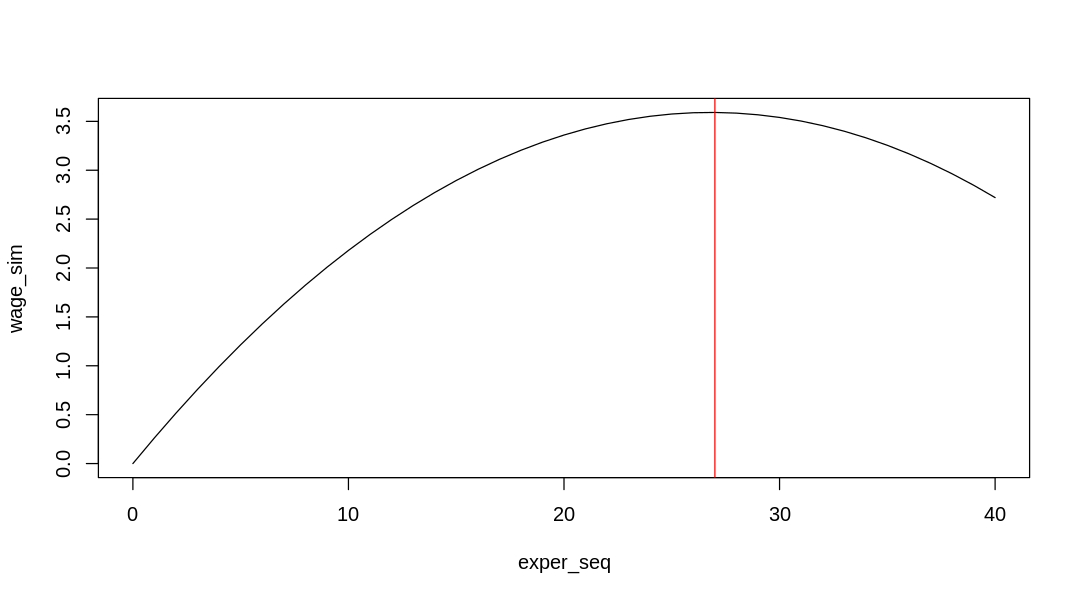

In [16]:
# simulate experience from 0 to 40 years
# seq = sequence generated from 0 to 30 with interval 1
exper_seq <- seq(0, 40, 1)
# ^2 means square
wage_sim <- 0.268 * exper_seq - 0.005 * exper_seq^2

# plot the relationship
plot(exper_seq, wage_sim, type="l")

# add vertical line
abline(v=27, col='red')

The model we estimated shows that the wage level stops increasing after 27 years of experience. You will not be aksed to do this kind of estimation in the exam. However, it is important to know how to interpret the regression results.
__Normally, many variables related to age and experienceare have properities of nonlinear__. For instance, the relationship between `wage` and `age` is nonlinear. The wage will increase with age, but it will stop after reaching a certain level.

integer(0)

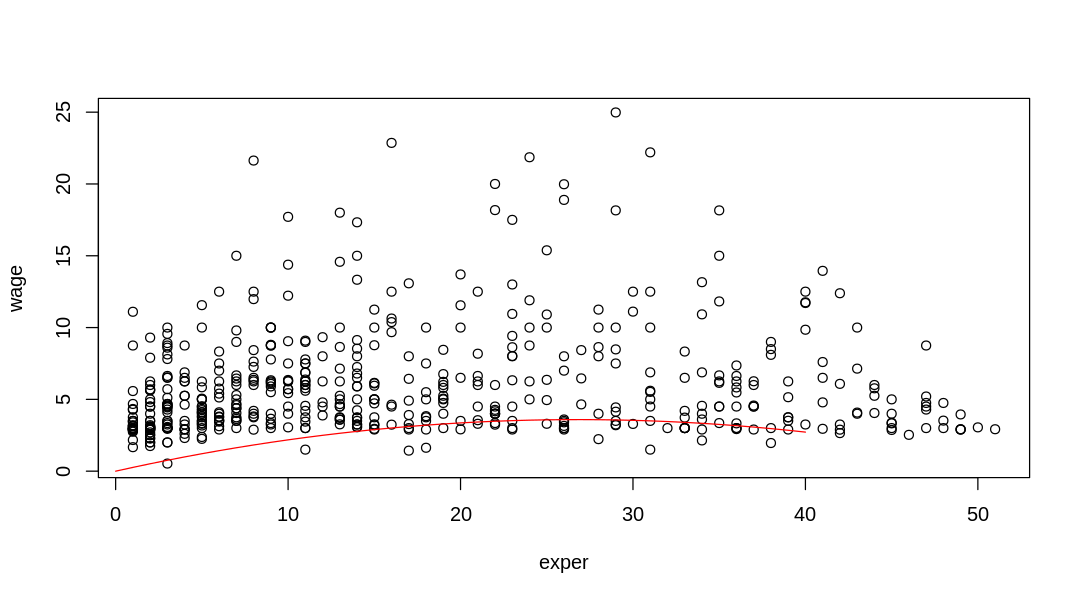

In [17]:
# we can put them together
wage1 %>%
    with(plot(exper, wage)) +
    lines(exper_seq, wage_sim, type="l", col='red')

Why the red curve above does not fit with the dataset exactly? Wage is real-lfe data, it is determined:

- educ
- experience
- industry
- networking
- other factors

In the above model, the red curve was generated based on only factor `exper`:

$$
wage = 0.595 \times educ + 0.268 \times exper - 0.005 \times exper^2
$$

We have controled the experience, here is the short summary of the regression results:

give me a table with four columns and three rows

| dependent variable | independent variable of interested | control variable1 | control variable2 |
| --- | --- | --- | --- |
| wage | education: 0.541***  | | |
| wage | eductation: 0.644***  | exper:  0.070*** | |
| wage | eductation: 0.595*** | exper:0.268*** | exper2: -0.005***  |

__The regression results are not causal__, but they are useful for us to understand the relationship between dependent variable and independent variables. Here we can be very confident to say that
__holding other factors constant, there is a very strong positive association between education and wage__. The reason is that the coefficient of education __did not change much__ when we add more control variables (such as experience). This means whether for people who have more experience or not, the education is still __positively associated__ with wage.

Now, how about the gender? __Does the relationship still hold for different genders?__ Let's run another regression analysis.

In [18]:
# add gender in the regression
wage_reg4 <- lm(wage ~ educ + exper + I(exper^2) + female, data=wage1)
stargazer(wage_reg4, type="text")


                        Dependent variable:    
                    ---------------------------
                               wage            
-----------------------------------------------
educ                         0.556***          
                              (0.050)          
                                               
exper                        0.255***          
                              (0.035)          
                                               
I(exper2)                    -0.004***         
                              (0.001)          
                                               
female                       -2.114***         
                              (0.263)          
                                               
Constant                     -2.319***         
                              (0.739)          
                                               
-----------------------------------------------
Observations                    526    

Here we notice that the coefficient for female is $-2.114$, which means __holding other
factors constant, women is associated with a decrease of 2.114 dollar an hour in wage comparing to men__.
__This means even with same education, experience, there is still negative association between being female and
wage__. Therefore, we can say this might be due to the gender discrimination in the labor market.

In [19]:
# now, let's put all tables together
stargazer(wage_reg2, wage_reg3, wage_reg4, type="text")


                                              Dependent variable:                          
                    -----------------------------------------------------------------------
                                                     wage                                  
                              (1)                     (2)                     (3)          
-------------------------------------------------------------------------------------------
educ                       0.644***                0.595***                0.556***        
                            (0.054)                 (0.053)                 (0.050)        
                                                                                           
exper                      0.070***                0.268***                0.255***        
                            (0.011)                 (0.037)                 (0.035)        
                                                                               

### Robustness check

__Robustness check__ is a very important concept in regression analysis. It is very important to check whether the results are robust to different specifications. For instance, we can run the regression analysis with different control variables. If the results are robust, then we can be more confident about the results.

### Regression diagnostics

After running the regression analysis, we need to check whether the results are reliable. There are many ways to check the reliability of the results. Here we will introduce two ways:

- __residual plot__: the residual plot is used to check whether the residuals are randomly distributed. If the residuals are randomly distributed, then we can say the results are reliable. Otherwise, we need to check the model specification. For instance, we might need to add more control variables to the model.

- __VIF__: VIF is used to check whether there is multicollinearity in the model. If the VIF is larger than 10, then we need to check whether there is multicollinearity in the model. If there is multicollinearity, then we need to remove some variables from the model.

### Log transformation

This only applies to continuous variables (like wage, R&D, etc. for variables like yes/no, female/male)

As we have discussed before, sometimes the dependent variable is not normally distributed.
For instance, the wage is not normally distributed. In this case, we can use log transformation
to make the dependent variable normally distributed.

The original model is:

$$
wage = \beta_0 + \beta_1 \times educ + \beta_2 \times exper + \beta_3 \times exper^2 + \beta_4  \times female + \epsilon; \quad \epsilon \sim N(0, \sigma^2)
$$

In [20]:
stargazer(wage_reg1, wage_reg2, wage_reg3, wage_reg4, type="text")


                                                          Dependent variable:                                       
                    ------------------------------------------------------------------------------------------------
                                                                  wage                                              
                              (1)                      (2)                     (3)                     (4)          
--------------------------------------------------------------------------------------------------------------------
educ                        0.541***                0.644***                0.595***                0.556***        
                            (0.053)                  (0.054)                 (0.053)                 (0.050)        
                                                                                                                    
exper                                               0.070***   

Now, let's use log transformation on the dependent variable:

$$
\begin{aligned}
wage & = \beta_0 + \beta_1 \times educ + \beta_2 \times exper + \beta_3 \times exper^2 + \beta_4  \times female + \epsilon; \quad \epsilon \sim N(0, \sigma^2) \\
\ln(wage) & = \beta_0 + \beta_1 \times educ + \beta_2 \times exper + \beta_3 \times exper^2 + \beta_4  \times female + \epsilon; \quad \epsilon \sim N(0, \sigma^2)
\end{aligned}
$$

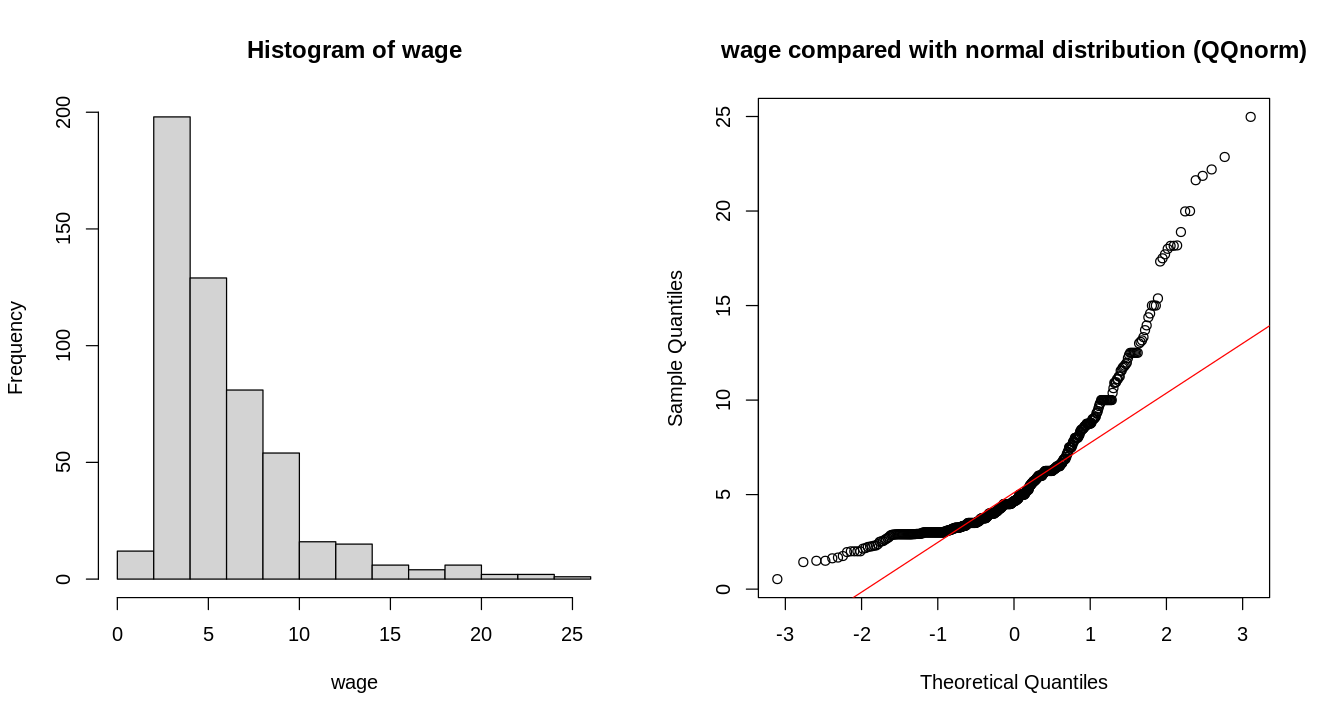

In [21]:
options(repr.plot.width = 11, repr.plot.height = 6)
par(mfrow=c(1,2))
wage1 %>%
    with(hist(wage))
qqnorm(wage1$wage, main="wage compared with normal distribution (QQnorm)")
qqline(wage1$wage, col='red')

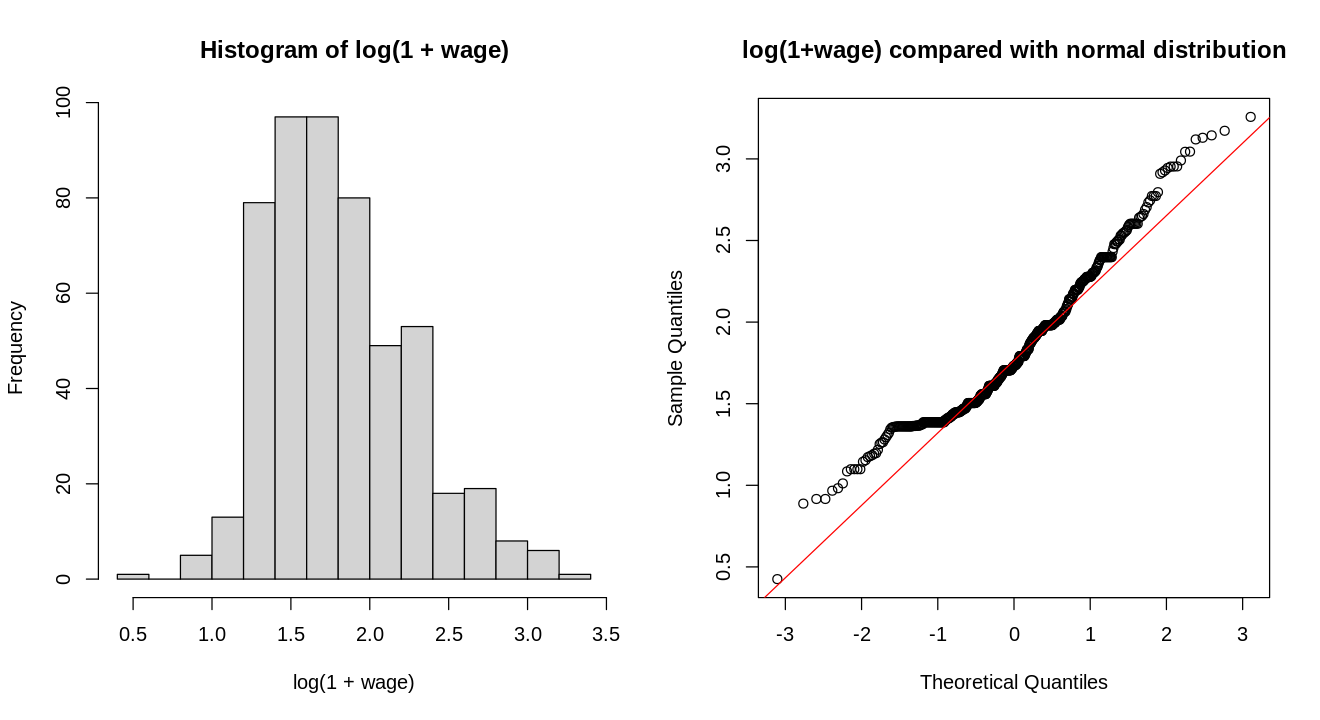

In [22]:
# log transformation for wage (depedent variable)
par(mfrow=c(1,2))
wage1 %>%
    with(hist(log(1+wage)))
qqnorm(log(1+wage1$wage), main="log(1+wage) compared with normal distribution")
qqline(log(1+wage1$wage), col='red')

In [23]:
# let's fit the model
wage_reg5 <- lm(log(1+wage) ~ educ + exper + I(exper^2) + female, data=wage1)

stargazer(wage_reg5, type="text")


                        Dependent variable:    
                    ---------------------------
                           log(1 + wage)       
-----------------------------------------------
educ                         0.071***          
                              (0.006)          
                                               
exper                        0.033***          
                              (0.004)          
                                               
I(exper2)                    -0.001***         
                             (0.0001)          
                                               
female                       -0.283***         
                              (0.030)          
                                               
Constant                     0.784***          
                              (0.086)          
                                               
-----------------------------------------------
Observations                    526    

Since we are dealing with log transformation now. The interpretation will be different. The following table
gives the summary

| | $X$ | $\ln(X)$ |
| --- | --- | --- |
|$Y$| linear: $Y = \beta_0 + \beta_1 X $ | linear-log: $Y=\beta_0 + \beta_1 \ln(X)$ |
| | one unit change in $X$ is associated with $\beta_1$ change in $Y$ | one unit change in $X$ is associated with $\beta_1/100$ change in $Y$ |
|$\ln(Y)$| log-linear  $\ln(Y) = \beta_0 + \beta_1 X $ | log-log: $\ln(Y) = \beta_0 + \beta_1 \ln(X) $ |
| |one unit change in $X$ is associated with $100 \cdot \beta_1$ percentage change in $Y$  | one percentage change in $X$ is associated with $\beta_1$ percent change in $Y$  |

In [24]:
# put everything together
stargazer(wage_reg1, wage_reg2, wage_reg3, wage_reg4, wage_reg5, type="text")


                                                                      Dependent variable:                                                   
                    ------------------------------------------------------------------------------------------------------------------------
                                                                  wage                                                    log(1 + wage)     
                              (1)                      (2)                     (3)                     (4)                     (5)          
--------------------------------------------------------------------------------------------------------------------------------------------
educ                        0.541***                0.644***                0.595***                0.556***                0.071***        
                            (0.053)                  (0.054)                 (0.053)                 (0.050)                 (0.006)        
            

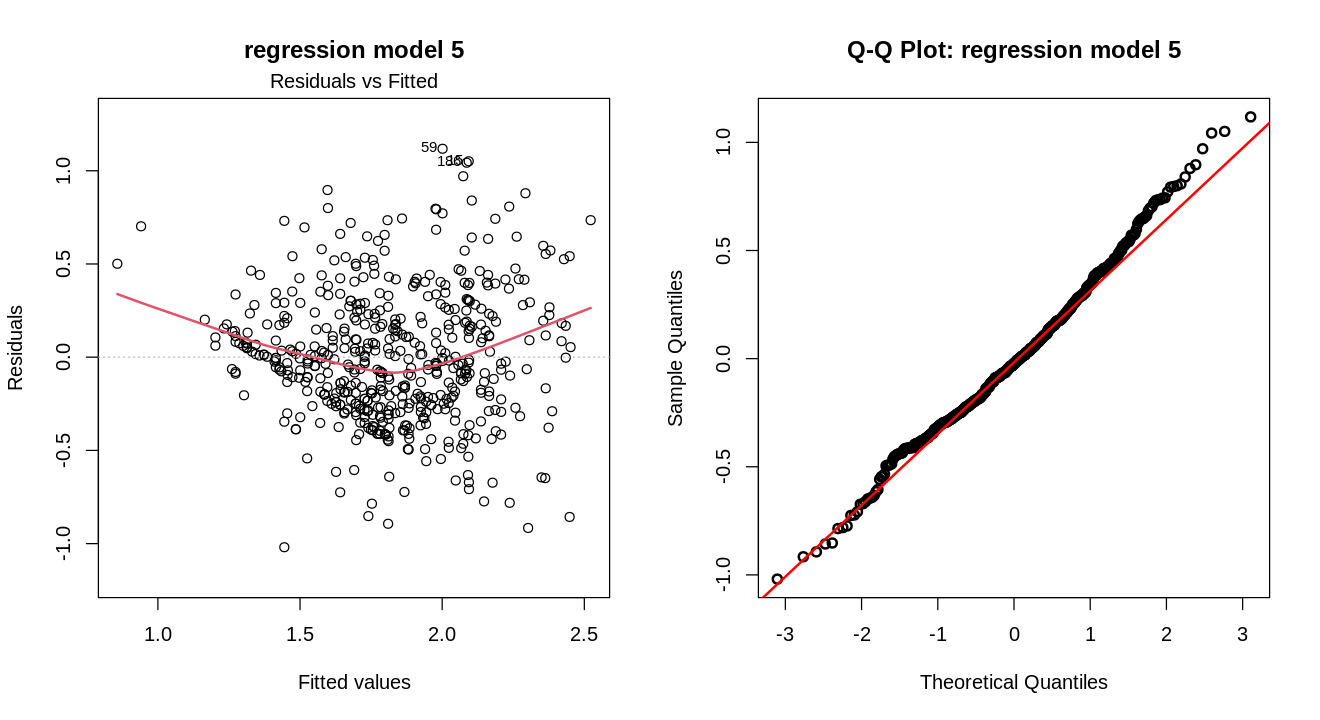

In [25]:
# residual plot for log transformation
options(repr.plot.width = 11, repr.plot.height = 6)
par(mfrow=c(1,2))
plot(wage_reg5, which=1, lwd=2, main="regression model 5")
qqnorm(resid(wage_reg5),lwd=2, main="Q-Q Plot: regression model 5")
qqline(resid(wage_reg5), col='red', lwd=2)

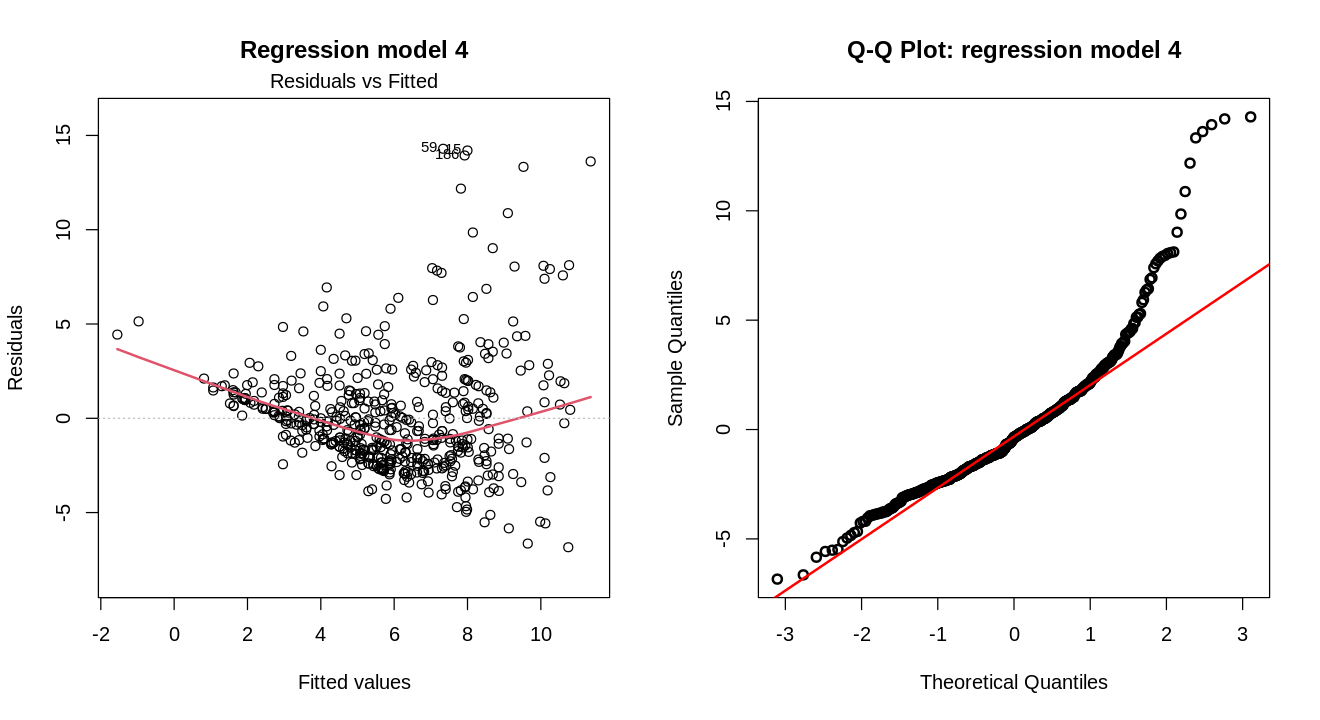

In [26]:
# residual plot without log transformation
options(repr.plot.width = 11, repr.plot.height = 6)
par(mfrow=c(1,2))
plot(wage_reg4, which=1, lwd=2, main="Regression model 4")
qqnorm(resid(wage_reg4),lwd=2, main="Q-Q Plot: regression model 4")
qqline(resid(wage_reg4), col='red', lwd=2)

### Summary

- why we need control variables
- check whether the coefficient is consistent or not by adding different control variables
- using dummy variable - gender discrimination
- why we need log transformation
- how to interpret the log transformation

### Multicollienarity

Multicollienarity is a very important concept in regression analysis. It means that there is a strong correlation between two or more independent variables. For instance, if we have two independent variables, $X_1$ and $X_2$, and they are strongly correlated, then we say there is a multicollinearity in the model.

This will cause the following problems:

- it increases the variance of the coefficients and makes the coefficients less reliable.
- it makes the interpretation of the coefficients difficult.

In [27]:
elem_data <- fread("data/elemapi.csv")
head(elem_data)

snum dnum api00 api99 growth meals ell yr_rnd mobility acs_k3 ⋯ not_hsg hsg
1  906 41   693   600   93     67     9  0      11       16     ⋯  0       0 
2  889 41   570   501   69     92    21  0      33       15     ⋯  0       0 
3  887 41   546   472   74     97    29  0      36       17     ⋯  0       0 
4  876 41   571   487   84     90    27  0      27       20     ⋯ 36      45 
5  888 41   478   425   53     89    30  0      44       18     ⋯ 50      50 
6 4284 98   858   844   14     NA     3  0      10       20     ⋯  1       8 
  some_col col_grad grad_sch avg_ed full emer enroll mealcat
1  0        0        0         NA    76  24   247    2      
2  0        0        0         NA    79  19   463    3      
3  0        0        0         NA    68  29   395    3      
4  9        9        0       1.91    87  11   418    3      
5  0        0        0       1.50    87  13   520    3      
6 24       36       31       3.89   100   0   343    1

- `api00` : grade API score in 2000
- `acs_k3`: average class size
- `avg_ed`: average education degree of parents
- `grad_sch`: parent graduation school
- `col_grad`: parent colledge degree
- `some_col`: parent some college

In [28]:
elem_data %>%
    .[, .(api00, acs_k3, avg_ed, grad_sch, col_grad, some_col)] %>%
    head()

api00 acs_k3 avg_ed grad_sch col_grad some_col
1 693   16       NA    0        0        0      
2 570   15       NA    0        0        0      
3 546   17       NA    0        0        0      
4 571   20     1.91    0        9        9      
5 478   18     1.50    0        0        0      
6 858   20     3.89   31       36       24

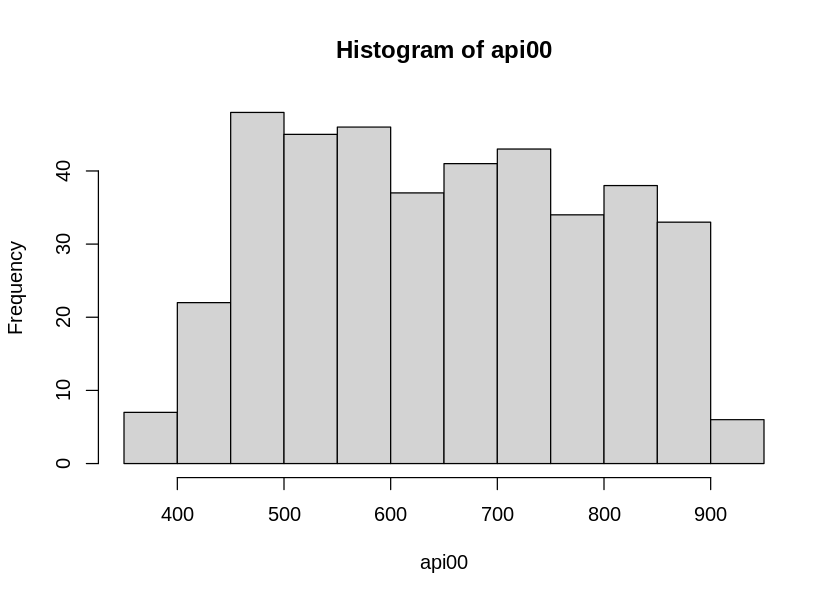

In [29]:
# check distribution
options(repr.plot.width = 7, repr.plot.height = 5)
elem_data %>%
    .[, .(api00, acs_k3, avg_ed, grad_sch, col_grad, some_col)] %>%
    with(hist(api00))

Now I want to exam:

$$
grade_{api00} = \beta_0 + \beta_1 acsK3 + \beta_2 avgEd + \beta_3 gradSch + \beta_4 colGrad + \beta_5 someCol + \epsilon ; \quad \epsilon \sim N(0, \sigma^2)
$$

In [30]:
elem_reg1 <- lm(api00 ~ acs_k3 + avg_ed +  grad_sch + col_grad + some_col, data = elem_data)
stargazer(elem_reg1, type='text')


                        Dependent variable:    
                    ---------------------------
                               api00           
-----------------------------------------------
acs_k3                       -2.361***         
                              (0.852)          
                                               
avg_ed                      227.640***         
                             (37.441)          
                                               
grad_sch                      -1.888           
                              (1.360)          
                                               
col_grad                     -3.085***         
                              (1.024)          
                                               
some_col                      -0.680           
                              (0.815)          
                                               
Constant                    178.510***         
                             (56.747)  

In [31]:
# see lab3 
check_model(elem_reg1)

ERROR while rich displaying an object: Error: The viewport is too small to show this set of plots. You may try one of
  the following steps to resolve this problem.
  
- To fix this issue, please make the window larger.
  
- If this doesn't help, try to reset the zoom settings of your IDE and
  then retry.
  
- If this still doesn't resolve your problems, you may check whether
  your apps are rescaled. On Windows, this can be done in the display
  settings (Start > Settings > System > Display, "Scale and layout").
  Reduce the scaling and try again.
  
- Finally, you can try to decrease the base font-size of your theme
  before plotting. Load `library(ggplot2)` and run:
  `theme_set(theme_classic(base_size = 6))`

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_cont

### High influential points

In [32]:
data("infmrt")
head(infmrt)

year infmort afdcprt popul pcinc physic afdcper  d90 lpcinc   lphysic  DC
1 1987 8.3     52      1186  13996 173    4.384486 0   9.546527 5.153292 0 
2 1990 6.2     62      1228  17125 178    5.048860 1   9.748295 5.181784 0 
3 1987 7.8     11      1056  18083 186    1.041667 0   9.802728 5.225747 0 
4 1990 7.1     21      1109  21051 200    1.893598 1   9.954703 5.298317 0 
5 1987 8.5     20       547  14267 244    3.656307 0   9.565704 5.497168 0 
6 1990 6.4     25       563  17630 253    4.440497 1   9.777357 5.533390 0 
  lpopul  
1 7.078341
2 7.113142
3 6.962244
4 7.011214
5 6.304449
6 6.333280

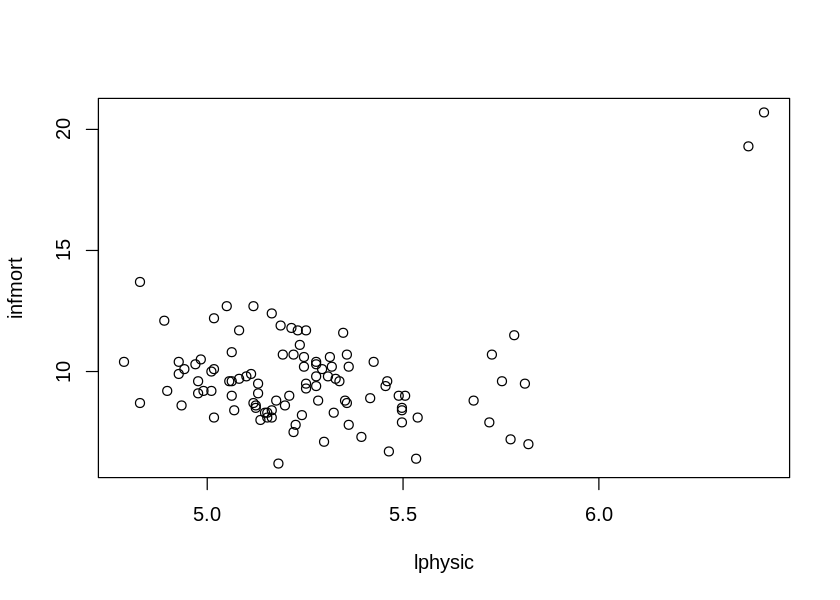

In [33]:
infmrt %>%
    with(plot(lphysic, infmort))

In [34]:
infmrt_reg1 <- lm(infmort ~ lpcinc + lphysic + lpopul, data = infmrt)
stargazer(infmrt_reg1, type="text")


                        Dependent variable:    
                    ---------------------------
                              infmort          
-----------------------------------------------
lpcinc                       -4.884***         
                              (1.293)          
                                               
lphysic                      4.028***          
                              (0.891)          
                                               
lpopul                        -0.054           
                              (0.187)          
                                               
Constant                     36.226***         
                             (10.135)          
                                               
-----------------------------------------------
Observations                    102            
R2                             0.182           
Adjusted R2                    0.157           
Residual Std. Error       1.891 (df = 9

In [35]:
check_model(infmrt_reg1)

ERROR while rich displaying an object: Error: The viewport is too small to show this set of plots. You may try one of
  the following steps to resolve this problem.
  
- To fix this issue, please make the window larger.
  
- If this doesn't help, try to reset the zoom settings of your IDE and
  then retry.
  
- If this still doesn't resolve your problems, you may check whether
  your apps are rescaled. On Windows, this can be done in the display
  settings (Start > Settings > System > Display, "Scale and layout").
  Reduce the scaling and try again.
  
- Finally, you can try to decrease the base font-size of your theme
  before plotting. Load `library(ggplot2)` and run:
  `theme_set(theme_classic(base_size = 6))`

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_cont